# Taller 5 (Casos COVID-19)
## Daniela Ruiz Valencia

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db_url = "C:\\Users\\Daniela\\Downloads\\covid19.db"
    
connection = sqlite3.connect(db_url)
    
query = f"""
        SELECT 
            t.date ,
            SUM(t.confirmed),
            SUM(t.deaths),
            SUM(t.recovered)
        FROM timeseries t 
        WHERE t.id in (
             SELECT l.id 
             FROM location l 
             WHERE l.iso_alpha_2  = "CO"
        )
        GROUP BY t.date
        ORDER BY t.date ASC;
        """

cursor = connection.cursor()
cursor.execute(query)
results = cursor.fetchall()

In [3]:
results

[('2020-03-05', None, None, None),
 ('2020-03-06', 3, None, None),
 ('2020-03-07', None, 3, None),
 ('2020-03-08', None, None, None),
 ('2020-03-09', 7, None, None),
 ('2020-03-10', None, 4, None),
 ('2020-03-11', 24, 5, None),
 ('2020-03-12', 30, None, None),
 ('2020-03-13', 40, None, 3),
 ('2020-03-14', 98, None, 6),
 ('2020-03-15', 128, 6, 5),
 ('2020-03-16', 152, 6, None),
 ('2020-03-17', 238, None, 5),
 ('2020-03-18', 215, None, None),
 ('2020-03-19', 343, None, 7),
 ('2020-03-20', 443, None, 12),
 ('2020-03-21', 577, None, 22),
 ('2020-03-22', 584, 12, 30),
 ('2020-03-23', 848, 9, 55),
 ('2020-03-24', 1062, 11, 79),
 ('2020-03-25', 1295, 24, 80),
 ('2020-03-26', 973, 21, 140),
 ('2020-03-27', 1075, 25, 160),
 ('2020-03-28', 1518, 41, 301),
 ('2020-03-29', 1803, 38, 348),
 ('2020-03-30', 2049, 60, 440),
 ('2020-03-31', 2435, 73, 499),
 ('2020-04-01', 2833, 70, 579),
 ('2020-04-02', 2858, 86, 663),
 ('2020-04-03', 3379, 134, 767),
 ('2020-04-04', 3508, 162, 913),
 ('2020-04-05', 37

In [4]:
df_casos = pd.DataFrame(results, columns=["Fecha", "Confirmados", "Muertes", "Recuperados"])

In [5]:
print(df_casos)

          Fecha  Confirmados   Muertes  Recuperados
0    2020-03-05          NaN       NaN          NaN
1    2020-03-06          3.0       NaN          NaN
2    2020-03-07          NaN       3.0          NaN
3    2020-03-08          NaN       NaN          NaN
4    2020-03-09          7.0       NaN          NaN
..          ...          ...       ...          ...
686  2022-01-20    5183530.0  138224.0    4904830.0
687  2022-01-21    5211038.0  138505.0    4933586.0
688  2022-01-22    5236086.0  127204.0    4958578.0
689  2022-01-23    5259542.0   99414.0    4981612.0
690  2022-01-24          NaN       NaN          NaN

[691 rows x 4 columns]


In [6]:
df_casos.fillna(0, inplace=True)
df_casos["Fecha"] = pd.to_datetime(df_casos["Fecha"])

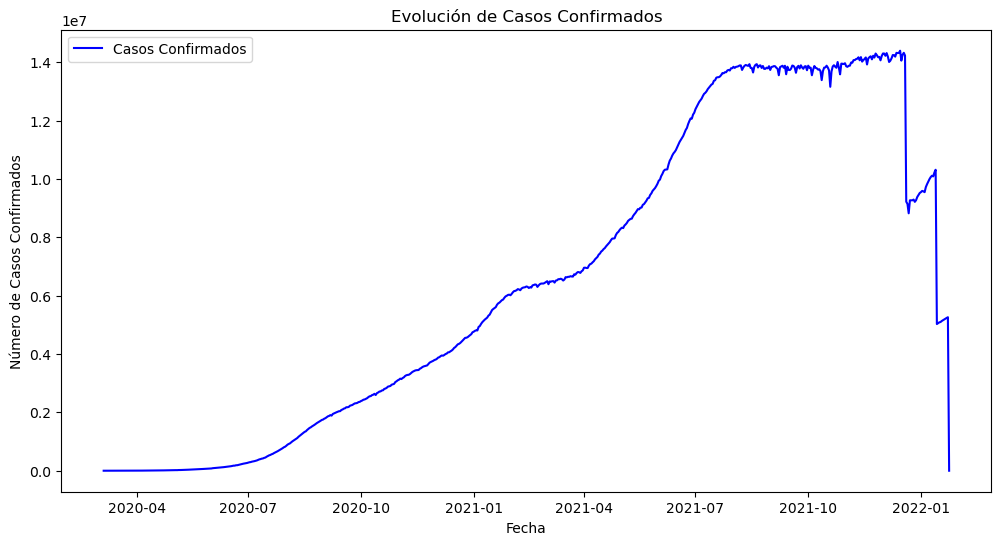

In [7]:
# Casos confirmados
plt.figure(figsize=(12, 6))
plt.plot(df_casos["Fecha"], df_casos["Confirmados"], label="Casos Confirmados", color='b')

plt.xlabel("Fecha")
plt.ylabel("Número de Casos Confirmados")
plt.title("Evolución de Casos Confirmados")
plt.legend()

plt.show()

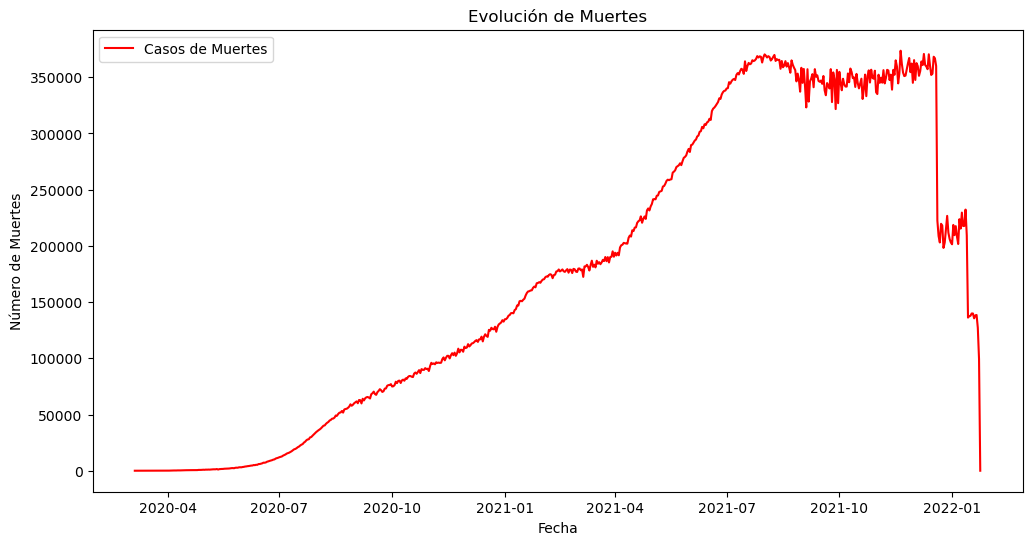

In [8]:
# Casos de muertes
plt.figure(figsize=(12, 6))
plt.plot(df_casos["Fecha"], df_casos["Muertes"], label="Casos de Muertes", color='r')

plt.xlabel("Fecha")
plt.ylabel("Número de Muertes")
plt.title("Evolución de Muertes")
plt.legend()

plt.show()

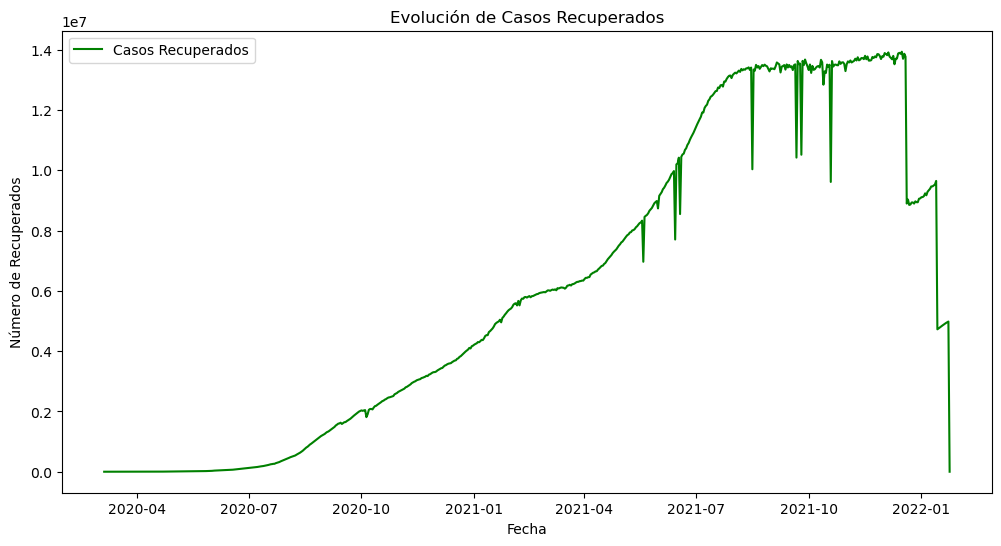

In [9]:
#Casos recuperados
plt.figure(figsize=(12, 6))
plt.plot(df_casos["Fecha"], df_casos["Recuperados"], label="Casos Recuperados", color='g')

plt.xlabel("Fecha")
plt.ylabel("Número de Recuperados")
plt.title("Evolución de Casos Recuperados")
plt.legend()

plt.show()

In [10]:
# Normalizar los datos usando Min-Max Scaling
df_norm = df_casos.copy()
columns_to_normalize = ["Confirmados", "Muertes", "Recuperados"]

for col in columns_to_normalize:
    min_val = df_casos[col].min()
    max_val = df_casos[col].max()
    df_norm[col] = (df_casos[col] - min_val) / (max_val - min_val) if max_val > min_val else 0

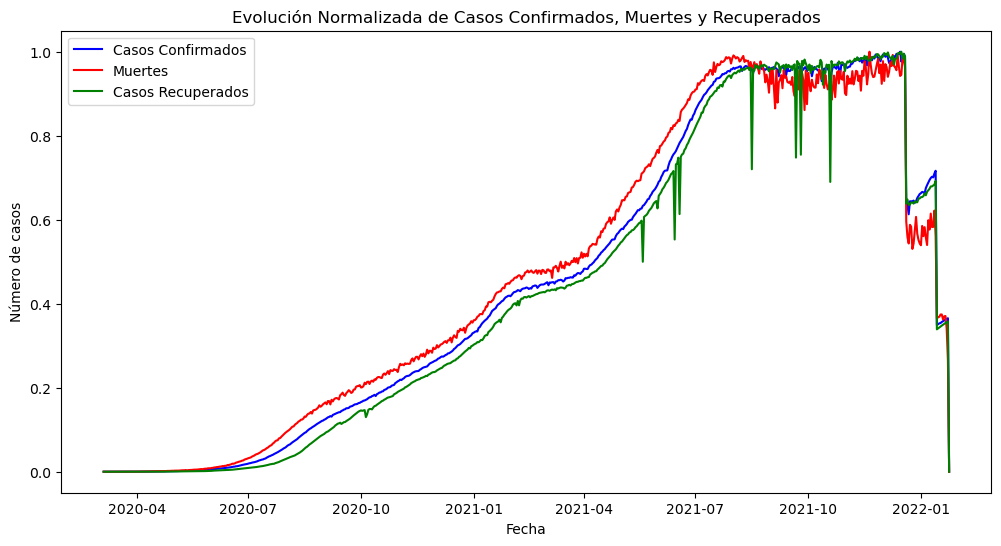

In [11]:
# Gráfica normalizada
plt.figure(figsize=(12, 6))

plt.plot(df_casos["Fecha"], df_norm["Confirmados"], label="Casos Confirmados", color='b')
plt.plot(df_casos["Fecha"], df_norm["Muertes"], label="Muertes", color='r')
plt.plot(df_casos["Fecha"], df_norm["Recuperados"], label="Casos Recuperados", color='g')

plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.title("Evolución Normalizada de Casos Confirmados, Muertes y Recuperados")
plt.legend()

plt.show()